<h1> Module 6 Submission </h1>
<h2> Machine Learning and Data Mining</h2>
<h3 style="margin-top: 10px;" > Stephen Eades </h3>

<p> 7/17/2020 </p>

<h4> Visualization </h4>

<ol>
    <li> Create a histograms as close to the sample_plot_result.png as possible. “x-distribution” is the “average” scores, “y-distribution” is the math scores 
    </li>
    <li> Create a function – find_outlier() that takes a string as input and output the outliers in the corresponding column in the dataframe. The outliers are defined as values more than 1.8 times of the standard deviation from the mean of the entire column 
    </li>
</ol>

*The assignment uses PISA 2012 dataset. It is currently in the first table at https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment_(2000_to_2012) (Links to an external site.). Click "SHOW" to see the table. 

<strong>Submission:</strong> You will export your notebook to both .html and .py formats. You will submit the following 2 files to Blackboard. In your html file, you should include all the outputs of your python script without error messages.

<ol>
    <li> Firstname_Lastname_Visualization.zip  (zip the .html and .ipynb files) </li>
    <li> Firstname_Lastname_Twitter.zip  (zip the .html and .ipynb files) </li>
</ol>

<strong>Attachments:</strong> 

<ol>
    <li>
    Sample_plot_result.png: Sample plot
    </li>
    <li>
    Outlier_function.png: Sample input and output of the find_outlier() function
    </li>
    <li>
    Map-of-a-tweet.png: Description of data fields in twitter tweets
    </li>
    <li>
Assignment 6(1).pdf
    </li>
</ol>

In [4]:
import pandas as pd
import scipy as sc

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

Using PISA data at: https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment_(2000_to_2012)

In [7]:
# Get Math data from memory and add column headers
df_math=pd.read_clipboard(header=None)
df_math.columns = ["Rank", "Country", "Score"]

In [8]:
# Get Science data from memory and add column headers
df_science=pd.read_clipboard(header=None)
df_science.columns = ["Rank", "Country", "Score"]

In [9]:
# Get Reading data from memory and add column headers
df_reading=pd.read_clipboard(header=None)
df_reading.columns = ["Rank", "Country", "Score"]

In [10]:
# Merge Math and Science data frames on Country
temp = pd.merge(df_math, df_science, on='Country', how='outer')

# Merge temp with Reading data frame on Country
temp = pd.merge(temp, df_reading, on='Country', how='outer')

# Remove unused columns
del temp['Rank_x'] 
del temp['Rank_y']
del temp['Rank']

# Rename columns to their appropriate subject
temp = temp.rename(index=str, columns={"Score_x": "Math", "Score_y": "Science", "Score": "Reading"})

# Convert values in each subject column to numbers 
math_numeric = pd.to_numeric(temp['Math'], errors='ignore')
science_numeric = pd.to_numeric(temp['Science'], errors='ignore')
reading_numeric = pd.to_numeric(temp['Reading'], errors='ignore')

# Create Average column, calculating the average and converting to integers
temp['Average'] = ((math_numeric+science_numeric+reading_numeric)/3)

/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


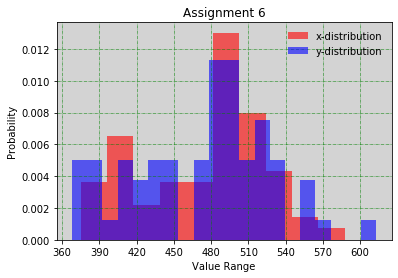

In [11]:
# Initial formatting and labeling
plt.title("Assignment 6")
plt.xlabel("Value Range")
plt.ylabel("Probability")
plt.xticks(np.arange(360, 650, step=30))

# Plot and add labels, additionally add the legend and style it
plt.hist(temp['Average'], color='Red', alpha=0.6, bins=10, density=True, label='x-distribution')
plt.hist(temp['Math'], color='Blue', alpha=0.6, bins=20, density=True, label='y-distribution')
plt.legend(loc=1, facecolor='white', framealpha=0.00)

# Polish the styling
plt.grid(color='green', linestyle='-.', linewidth=0.5)
plt.axes().set_facecolor('lightgray')
plt.show()

<p> Now create function to find outliers </p>

In [26]:
def find_outlier(str):
    sum = 0
    mean = 0
    
    # Convert to numbers
    numeric_column = pd.to_numeric(temp[str], errors='ignore')
    
    # Calculate the sum and mean
    for number in numeric_column:
        sum = sum + number
        
    mean = sum/len(numeric_column)
    
    # Find the standard deviation
    std_dev = np.std(numeric_column)
    
    # Find values that are a distance of (std_dev * 1.8) or greater from the mean
    country_index = 0
    country_array = []
    for number in numeric_column: 
        difference = number - (std_dev * 1.8)
        
        # Convert to absolute value, then compare against mean
        if abs(difference) > mean:
            
            # Stash the countries that are considered outliers
            country_array.append(temp['Country'][country_index])
            
        # Increment for next loop
        country_index = country_index + 1
            
    
    return f'The outliers in {str} are: {country_array}'

In [27]:
find_outlier('Math')

"The outliers in Math are: ['China Shanghai, China ', ' Singapore ']"

In [28]:
find_outlier('Science')

"The outliers in Science are: ['China Shanghai, China ']"

In [29]:
find_outlier('Reading')

"The outliers in Reading are: ['China Shanghai, China ']"

In [30]:
find_outlier('Average')

"The outliers in Average are: ['China Shanghai, China ']"